In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({
    'figure.figsize': (4.8, 2.7), 'font.size': 15, 'lines.linewidth': 2,
    'xtick.labelsize': 'small', 'ytick.labelsize': 'small',
    'legend.fontsize': 'small', 'axes.titlesize': 'medium',
    'axes.spines.top': False, 'axes.spines.right': False,
    'image.interpolation': 'nearest', 'savefig.dpi': 100,
})

import numpy as np
from numpy.fft import fftfreq, ifft2

rng = np.random.default_rng()

In [2]:
size = (96, 128)
# size = (3, 4)
alpha = 1
beta = -2
theta_min, theta_max = -np.pi/2, 0

fx, fy = np.meshgrid(fftfreq(size[1]), fftfreq(size[0]))
f = (fx**2+fy**2)**0.5
eps = 1e-5/max(size)
S_f = (f+eps)**beta
S_f[0, 0] = 0.

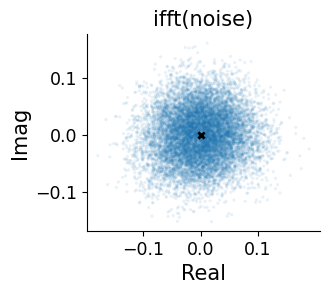

In [3]:
_, ax = plt.subplots(figsize=(3, 3))
noise = (rng.normal(size=size)+1j*rng.normal(size=size))*S_f**0.5
x_comp = ifft2(noise)
ax.scatter(np.real(x_comp).flatten(), np.imag(x_comp).flatten(), s=5, alpha=0.1, edgecolor='none')
ax.scatter(0, 0, s=20, marker='x', color='black')
ticks = [-0.1, 0, 0.1]
ax.set_xticks(ticks)
ax.set_xlabel('Real')
ax.set_yticks(ticks)
ax.set_ylabel('Imag')
ax.set_title('ifft(noise)')
ax.set_aspect('equal')
plt.show()

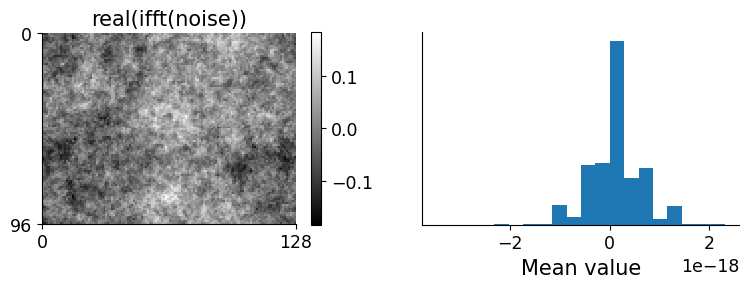

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(9, 2.5))

ax = axes[0]
noise = (rng.normal(size=size)+1j*rng.normal(size=size))*S_f**0.5
x_real = np.real(ifft2(noise))
vlim = np.abs(x_real).max()
h = ax.imshow(x_real, extent=[0, size[1], size[0], 0], vmin=-vlim, vmax=vlim, cmap='gray')
ax.set_xticks([0, size[1]])
ax.set_yticks([0, size[0]])
fig.colorbar(h, ax=ax)
ax.set_title('real(ifft(noise))')

ax = axes[1]
x_mean = []
n_seeds = 5000
for _ in range(n_seeds):
    noise = (rng.normal(size=size)+1j*rng.normal(size=size))*S_f**0.5
    x_mean.append(np.real(ifft2(noise)).mean())
ax.hist(x_mean, 20, density=True)
ax.set_xlabel('Mean value')
ax.set_yticks([])

plt.show()

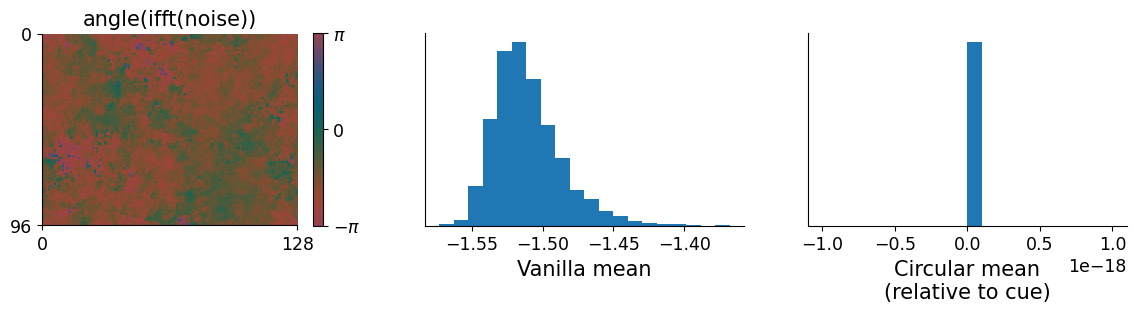

In [5]:
from hexarena.color import get_cmap

kappa = 0.1
cue = 0.
theta = cue*(theta_max-theta_min)+theta_min

fig, axes = plt.subplots(1, 3, figsize=(14, 2.5))

ax = axes[0]
noise = (rng.normal(size=size)+1j*rng.normal(size=size))*S_f**0.5
x_comp = ifft2(noise)+kappa*np.exp(1j*theta)
x_angle = np.angle(x_comp)
vlim = np.pi
h = ax.imshow(x_angle, extent=[0, size[1], size[0], 0], vmin=-vlim, vmax=vlim, cmap=get_cmap())
ax.set_xticks([0, size[1]])
ax.set_yticks([0, size[0]])
cbar = fig.colorbar(h, ax=ax, ticks=[-np.pi, 0, np.pi])
cbar.ax.set_yticklabels([r'$-\pi$', '0', r'$\pi$'])
ax.set_title('angle(ifft(noise))')


v_mean, c_mean = [], []
crops = []
n_seeds = 5000
for _ in range(n_seeds):
    noise = (rng.normal(size=size)+1j*rng.normal(size=size))*S_f**0.5
    x_comp = ifft2(noise)+kappa*np.exp(1j*theta)
    v_mean.append(np.angle(x_comp).mean())
    c_mean.append(np.angle(x_comp.mean()))
    crops.append(np.angle(x_comp)[:size[0]//2, :size[1]//2].mean())
ax = axes[1]
ax.hist(v_mean, 20, density=True)
ax.set_xlabel('Vanilla mean')
ax.set_yticks([])
ax = axes[2]
ax.hist(c_mean-np.mean(c_mean), np.linspace(-1e-18, 1e-18, 21), density=True)
ax.set_xlabel('Circular mean\n(relative to cue)')
ax.set_yticks([])

plt.show()